## Get Packages 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read The Data And Show Some Info

In [2]:
df= pd.read_csv('./TheData/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [4]:
df.sample(2)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
9317,2221330234,17,86.0,172731638,202,3984.0,1011128187,35225,LRDA,3,2,0,5,0,2
47691,3578878147,2,62.0,934830567,2,62.0,3871867998,27477,Other,0,0,0,2,6,7


In [8]:
print('Train shape:', df.shape )

Train shape: (106800, 15)


In [9]:
TARGETS = df.columns[-6:]
print('Targets', list(TARGETS))

Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [10]:
train = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_id':'first','spectrogram_label_offset_seconds':'min'})

In [11]:
train.columns = ['spec_id','min']

In [12]:
Max = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_label_offset_seconds':'max'})
train['max'] = Max

In [13]:
Patient = df.groupby('eeg_id')[['patient_id']].agg('first')
train['patient_id'] = Patient

In [14]:
Targets = df.groupby('eeg_id')[TARGETS].agg('sum')
for t in TARGETS:
    train[t] = Targets[t].values

In [15]:
y_data = train[TARGETS].values
y_data = y_data / y_data.sum(axis=1,keepdims=True)
train[TARGETS] = y_data

In [16]:
Decision = df.groupby('eeg_id')[['expert_consensus']].agg('first')
train['Decision'] = Decision

In [17]:
train.head()

,spec_id,min,max,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,Decision
eeg_id,,,,,,,,,,,
568657,789577333,0.0,16.0,20654,0.0,0.000000,0.25,0.000000,0.166667,0.583333,Other
582999,1552638400,0.0,38.0,20230,0.0,0.857143,0.00,0.071429,0.000000,0.071429,LPD
642382,14960202,1008.0,1032.0,5955,0.0,0.000000,0.00,0.000000,0.000000,1.000000,Other
751790,618728447,908.0,908.0,38549,0.0,0.000000,1.00,0.000000,0.000000,0.000000,GPD
778705,52296320,0.0,0.0,40955,0.0,0.000000,0.00,0.000000,0.000000,1.000000,Other


## Show Heat Map Done By Atwan

In [26]:
correlation_matrix = train[TARGETS].corr()

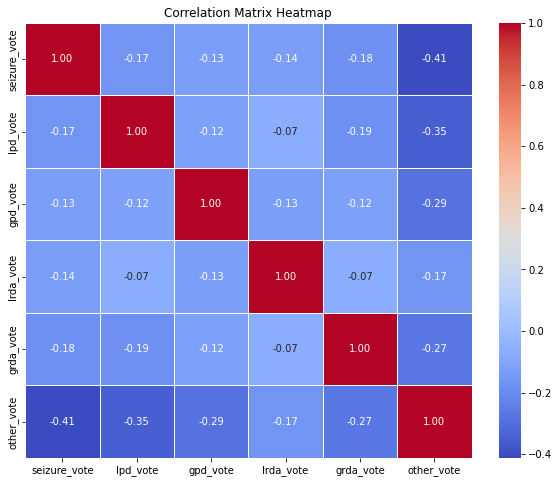

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()